In [15]:
import pickle

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns

from sklearn.model_selection import train_test_split

# REPO LINK:
# git@github.com:usc-ee250-fall2021/lab9-lab9_jack_anton.git
#TEAM MEMBERS: JACK CARTER, ANTON RAMIREZ

In [16]:
coins = pd.read_csv("coins.csv")
coins.head(10)

,reflectance,weight,denomination
0,24.226059,4.384837,1
1,24.322672,5.014980,1
2,23.527142,4.569030,1
3,26.765469,6.320783,1
4,22.457390,4.954992,1
5,22.912666,5.286136,1
6,23.095557,4.432129,1
7,26.447107,5.660208,1
8,25.152615,5.256971,1
9,25.137096,4.227505,1


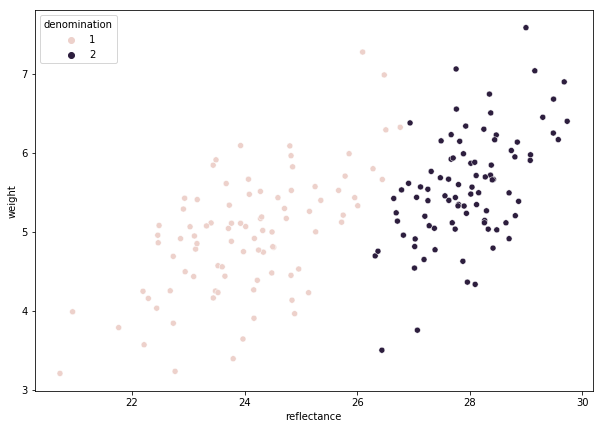

In [17]:
sns.scatterplot(x="reflectance",y="weight",data=coins, hue="denomination")

In [18]:
# test train split
X = coins[["reflectance","weight"]].to_numpy()
y = coins[["denomination"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
## Import your favourite classifier and train it using the X_train data and hte y_train labels

from sklearn.neighbors import KNeighborsClassifier

## make sure you instantiate your classifier and name it clf

clf = KNeighborsClassifier(n_neighbors=5)   #Code copied from sklearn, 'neigh' changed to 'clf'
clf.fit(X_train, y_train.ravel())

y_pred=clf.predict(X_test)
## for example, if you are using perceptron, you would do the following - 

# -> from sklearn.linear_model import Perceptron
# -> clf = Perceptron(tol=1e-3, random_state=0)
# .... call fit , etc.

In [20]:
## test the accuracy of your model
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  1.0


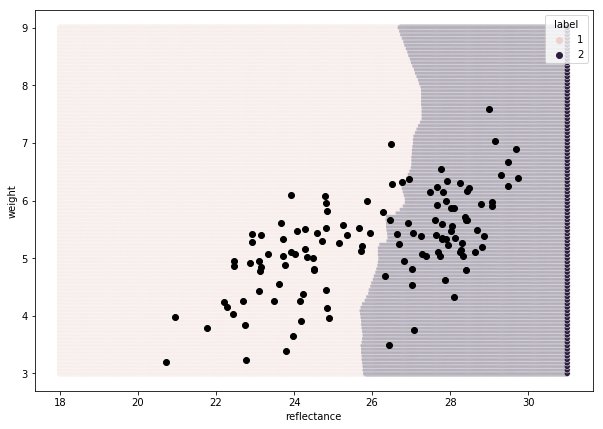

In [45]:
## plot the decision boundary of your classifier along with the scatterplot of the training data
## hint: look at the ann example


#reflectance = np.linspace(min(X_train)*0.9,max(X_train)*1.1,1000)
#weight = np.linspace((min(y_train)*0.9),(max(y_train)*1.1),100)
reflectance = np.linspace(18,31,1000)
weight = np.linspace(3,9,100)
from itertools import product
randomdata = np.array(list(product(reflectance,weight)))
g = clf.predict(randomdata)
db=pd.DataFrame({"reflectance":randomdata[:,0],"weight":randomdata[:,1],"label": g })
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=len(X_train),random_state=42)
sns.scatterplot(data=db,x="reflectance",y="weight",hue="label")
plt.scatter(X_train[:,0],X_train[:,1],color="black")

In [34]:
## additional stuff you want to add 

In [35]:
# dump your classifier into a pickle file
pickle.dump(clf, open("model.pickle","wb"))